# Data Prepapration

## <font>Titanic Dataset for Non Time Series problem</font>
https://www.kaggle.com/c/titanic/data

In [38]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)


Training data shape:  (891, 12)
Test data shape:  (418, 11)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### For each passenger in the test set, we need to create a model that predicts whether or not the passengers survived the sinking of the Titanic. Hence Survived is that target column in the dataset. Let's examine the Distribution of the target column

In [15]:
ds = train['Survived'].value_counts()
ds

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: title={'center': 'Survived Distribution'}, xlabel='Survived', ylabel='Count'>

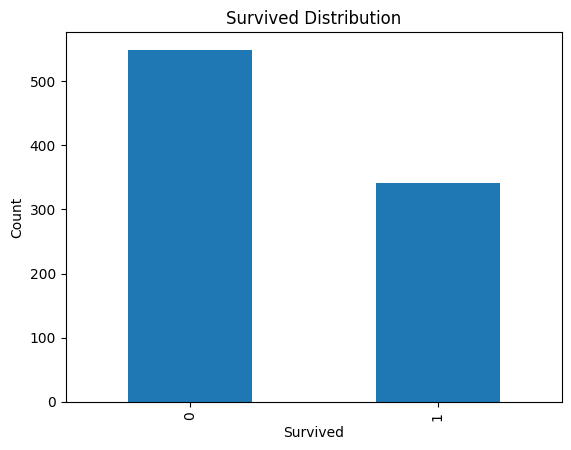

In [25]:
ds.plot.bar(title='Survived Distribution', xlabel='Survived', ylabel='Count')

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [ ]:
missing_values_train = train.isnull().sum()
percentage_missing_train = (missing_values_train / len(train)) * 100
missing_values_table_train = pd.concat([missing_values_train, percentage_missing_train], axis=1)
missing_values_table_train.columns = ['Missing Values', 'Percentage']
print(missing_values_table_train)

             Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                     177   19.865320
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Cabin                   687   77.104377
Embarked                  2    0.224467


In [29]:
# missing values in the testing dataset

missing_values_test = test.isnull().sum()
percentage_missing_test = (missing_values_test/len(test)) * 100
missing_values_table_test = pd.concat([missing_values_test, percentage_missing_test], axis=1)   
missing_values_table_test.columns = ['Missing Values', 'Percentage']
print(missing_values_table_test)

             Missing Values  Percentage
PassengerId               0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                      86   20.574163
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      1    0.239234
Cabin                   327   78.229665
Embarked                  0    0.000000


<Axes: >

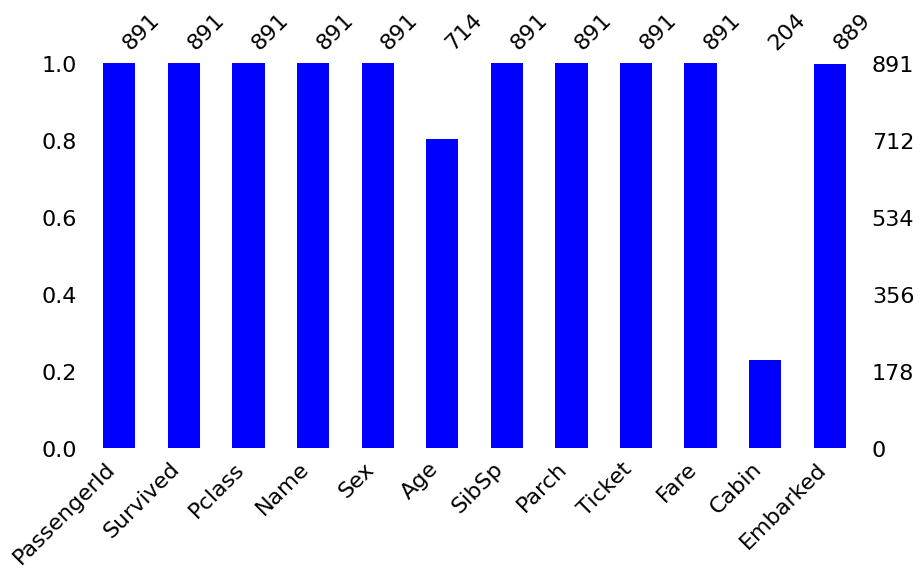

In [ ]:
# using missingno to visualize missing values

msno.bar(train, color='blue', figsize=(10, 5))


<Axes: >

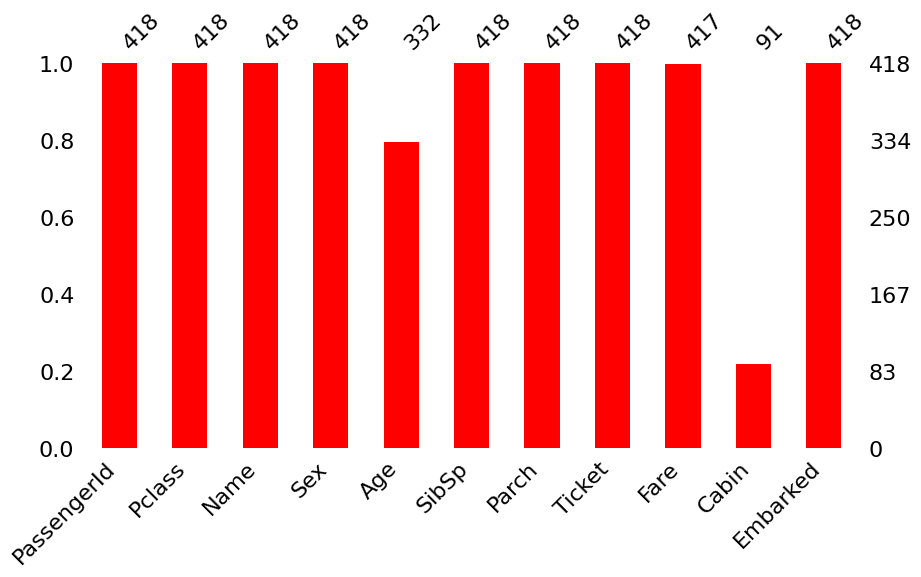

In [ ]:
msno.bar(test, color='red', figsize=(10, 5))

<Axes: >

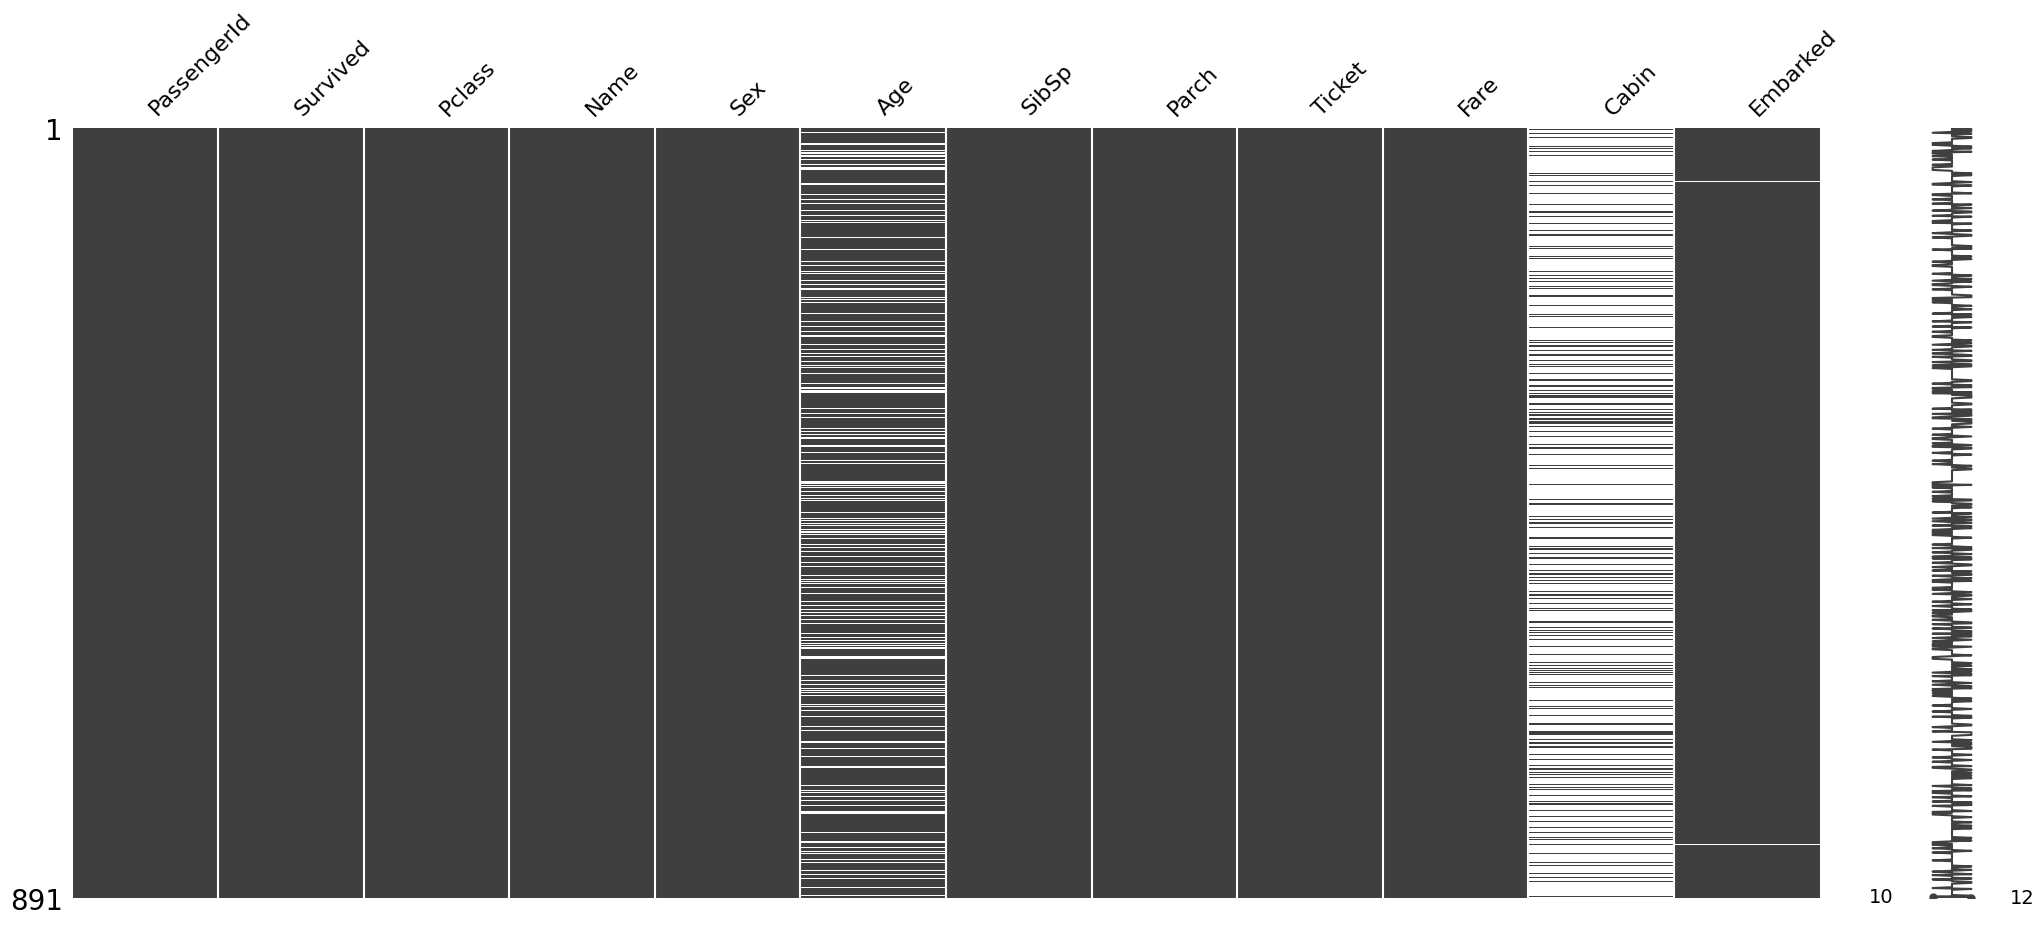

In [ ]:
msno.matrix(train) #this shows the distribution of missing values in the dataset

<Axes: >

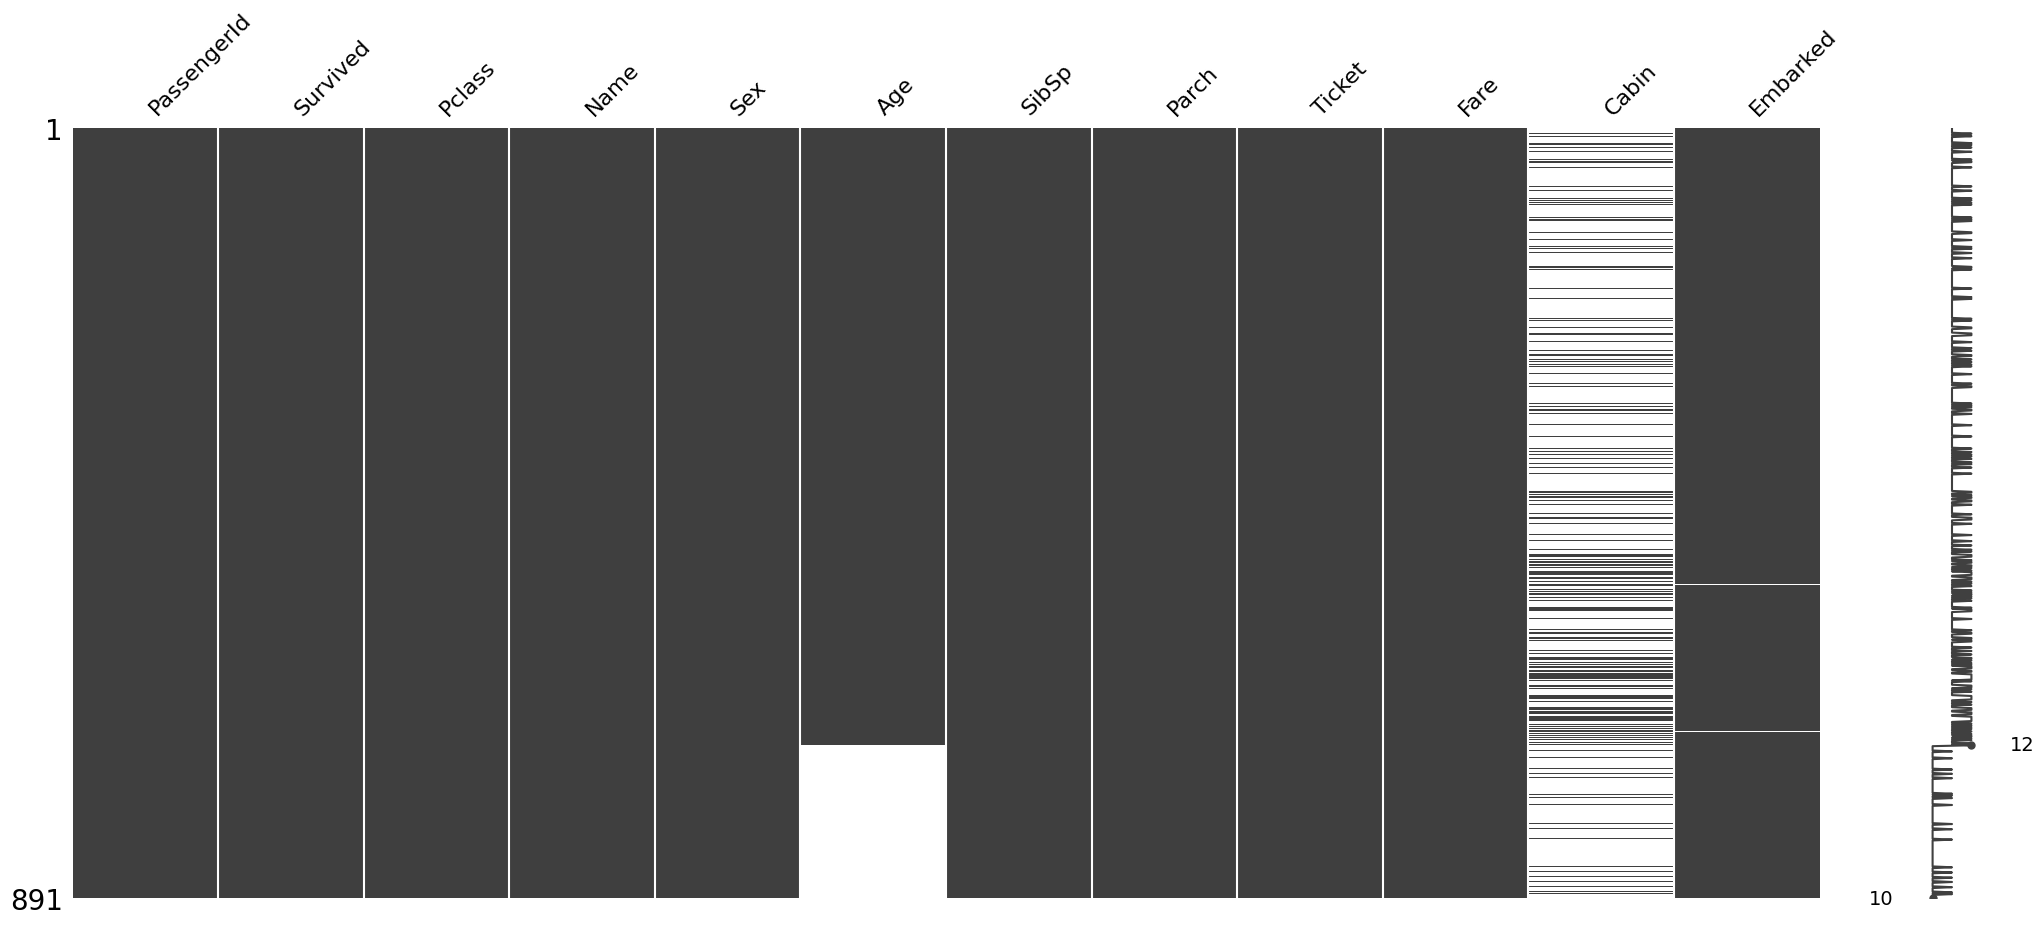

In [39]:
#sorted by Age
msno.matrix(train.sort_values('Age'))

<Axes: >

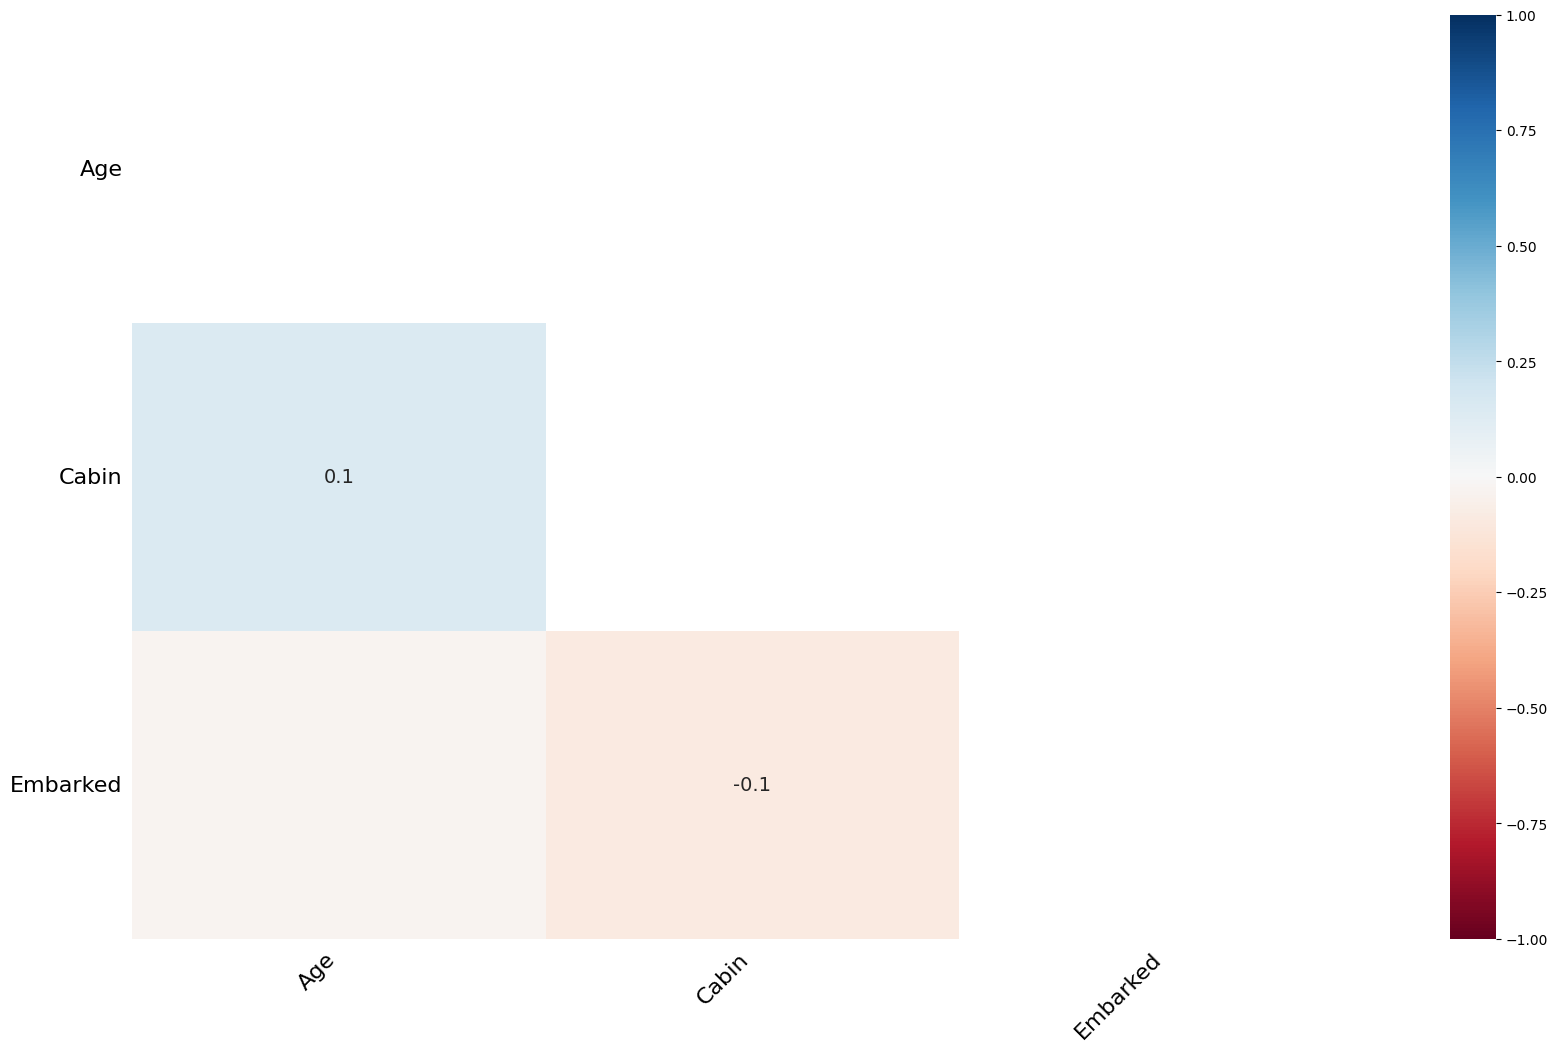

In [40]:
msno.heatmap(train)

The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.

### Treating Missing Values

**Pairwise Deletion** is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [68]:
train_1 = train.copy()
train_1['Age'].describe() 

#pandas skips the missing values and calculates mean of the remaining values.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Listwise deletion**, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [48]:
#drop the rows with missing values
train_1.dropna(subset=['Age'], how='any',inplace=True)
train_1['Age'].isnull().sum()

np.int64(0)

The Listwise deletion problem is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

**Dropping complete columns**
If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

### <font>Imputations (General) Techniques for non Time Series Problems</font>

Basic Imputation Techniques:

*   Imputating with a constant value

*   Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located

For this we shall use the The SimpleImputer class from sklearn.

In [54]:
from sklearn.impute import SimpleImputer
# using SimpleImputer to fill missing values with a constant value
train_const = train.copy()
imputer =  SimpleImputer(strategy='constant', fill_value=0) # fill missing values with 0
train_const.iloc[:,:]= imputer.fit_transform(train_const) # this will fill all missing values in the dataset with 0
# check if there are any missing values left
train_const.isnull().sum()

# using mean will not work for categorical variables

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [55]:
train_const = train.copy()
main_imputer = SimpleImputer(strategy = 'most_frequent')
train_const.iloc[:,:] = main_imputer.fit_transform(train_const)
train_const.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Advance Imputation Techniques

In [ ]:
# using KNNImputer to fill missing values

scaler = MinMaxScaler()
train_knn = train.copy(deep=True)
train_knn['Age']= scaler.fit_transform(train_knn['Age'].to_numpy().reshape(-1, 1)) # scaling the Age column to [0, 1] range
knn_imputer = KNNImputer(n_neighbors=5, weights = "uniform") # using 5 nearest neighbors
train_knn['Age'] =  knn_imputer.fit_transform(train_knn[['Age']])

train_knn['Age'].head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age, dtype: float64

In [64]:
train_knn['Age'].isnull().sum()

np.int64(0)

#### <font color='Orange'>Multivariate feature imputation - Multivariate imputation by chained equations (MICE)</font>

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample of the data, then takes the average of the multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:

In [69]:
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])